In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal as sig
from scipy import ndimage

In [4]:
img = cv2.imread("chess.png")

In [5]:
imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(imgRGB, cv2.COLOR_RGB2GRAY)

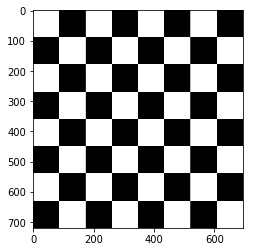

In [6]:
plt.imshow(gray, cmap='gray')

## cv2 Harris Corner Detector in-built function

In [7]:
dst = cv2.cornerHarris(gray,5,3,0.04)
dst = cv2.dilate(dst,None)

In [8]:
img[dst>0.01*dst.max()]=[0,0,255]

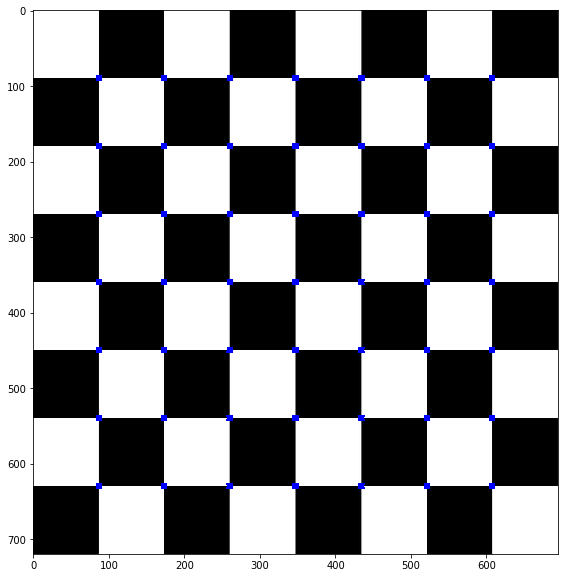

In [9]:
plt.figure(figsize=(10,10))
plt.imshow(img)

## Harris Corner Detector Implementation

### Spatial Derivative Calculation - Sobel filtering

In [10]:
sobel_filter = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
I_x = sig.convolve2d(gray,sobel_filter,mode='same')
I_y = sig.convolve2d(gray,np.flip(sobel_filter.T, axis=0),mode='same')

### Calculation for M

In [11]:
IxIx = I_x**2
IyIy = I_y**2
IxIy = I_x*I_y

In [12]:
# Ixx = I_x**2
# Iyy = I_y**2
# Ixy = I_x*I_y

In [13]:
# IxIx=ndimage.gaussian_filter(Ixx,sigma=1)
# IyIy=ndimage.gaussian_filter(Iyy,sigma=1)
# IxIy=ndimage.gaussian_filter(Ixy,sigma=1)

### Harris response Calculation

In [14]:
k=0.05
detM = IxIx*IyIy - IxIy**2
traceM = IxIx + IyIy
R = detM - k*((traceM)**2)

### Corner detection with R

In [15]:
corners_img = np.copy(img)
edges_img = np.copy(img)

In [16]:
for i in range(len(R)):
    for j in range(len(R[i])):
        r=R[i][j]
        if r > 0:
            corners_img[i, j] = [255,0,0]
        elif r < 0:
            edges_img[i,j] = [0,255,0]

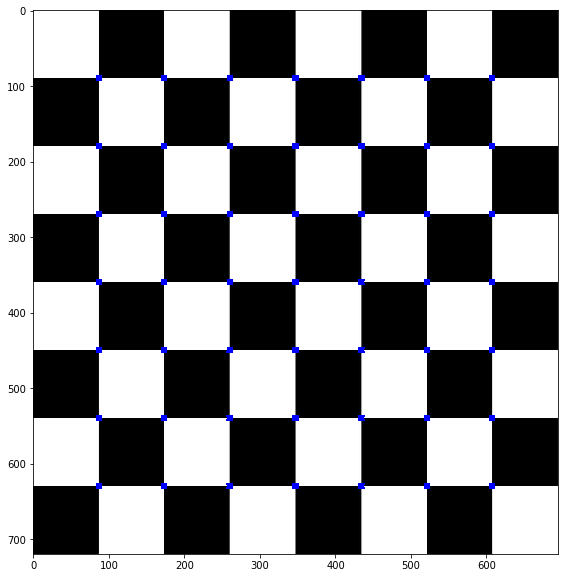

In [17]:
plt.figure(figsize=(10,10))
plt.imshow(corners_img)